# Hw1 Stock Prediction

In this homework, we want to predict the stock of Google to get the highest profit.

-------------

## Load Data and Clean Data

Check training data and testing data are clear. Use pandas to show the data form of the top five.

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
training_data_path = 'training_data.csv'
training_data = pd.read_csv(training_data_path, names=["Open", "High", "Low", "Close"])

testing_data_path = 'testing_data.csv'
testing_data = pd.read_csv(testing_data_path, names=["Open", "High", "Low", "Close"])
training_data.head()

,Open,High,Low,Close
0,209.894836,216.427353,207.758728,216.208771
1,220.515762,223.029404,218.454163,221.181427
2,221.558975,224.316040,219.323517,224.162048
3,226.958847,233.729813,225.155579,231.325455
4,231.698029,235.170441,228.980698,231.941452


By output, we can ensure that the training_data has no invalid value.

In [4]:
training_data.isna().any()

Open     False
High     False
Low      False
Close    False
dtype: bool

In [5]:
testing_data.isna().any()

Open     False
High     False
Low      False
Close    False
dtype: bool

-------------

## Show the Open Price Trend in training_data

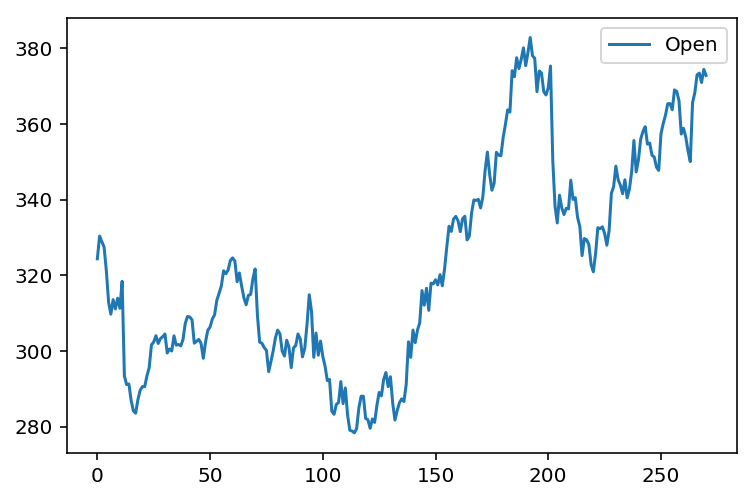

In [6]:
training_data[:].plot(y='Open')

-------------

## Produce Classification Results of training_data

In this part, I use **three different methods** to decide the label of each input.

* tomorrow's open - today's open
    * **rise**: 1
    * **equal**: 0  
    * **fall**: -1

In [6]:
 def checkCondition(pre, last):
    if (pre > last):
        return -1
    elif (pre < last):
        return 1
    else:
        return 0

* (tomorrow's open - today's open) / today's open
    * **>= 0.025**: 1
    * **0.025 >  >= -0.025**: 0
    * **-0.025 >**: -1

In [7]:
 def checkCondition(pre, last):
    ratio = 0.025
    value = (last - pre) / pre
    if(-1 * ratio <= value and value < ratio):
        return 0
    elif(ratio <= value):
        return 1
    elif(value < -1 * ratio):
        return -1

* tomorrow's open - today's open
    * **0.7 >=**: 1
    * **0.7 > >= -1.1**: 0
    * **-1.1 >**: -1

In [8]:
def checkCondition(pre, last):
    value = (last - pre)
    if(-1.1 <= value and value < 0.7):
        return 0
    elif(0.7 <= value):
        return 1
    elif(value < -1.1):
        return -1

### Conclusion

I decide to use rise/fall ratio to produce data labels. Because it's more fitting for another stock but not only for google stock. Besides, I expand the number of labels from 3 to 9(-4,-3, ..., 3, 4) according to following rules.

In [9]:
def checkCondition(pre, last):
    ratio = 0.0041
    value = (last - pre) / pre

    if(-0.5 * ratio <= value and value < ratio * 0.5):
        return 0
    elif(0.5 * ratio <= value and value < ratio * 1.5):
        return 1
    elif(1.5 * ratio <= value and value < ratio * 2.5):
        return 2
    elif(2.5 * ratio <= value and value < ratio * 3.5):
        return 3
    elif(3.5 * ratio <= value):
        return 4
    elif(-1.5 * ratio <= value and value < ratio * -0.5):
        return -1
    elif(-2.5 * ratio <= value and value < ratio * -1.5):
        return -2
    elif(-3.5 * ratio <= value and value < ratio * -2.5):
        return -3
    elif(value < ratio * -3.5):
        return -4

-------------

## Use K-Neighbors Classifier Model to Predict Value

use sklearn package `GridSearchCV` to implement cross validation

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

In [11]:
train_Y = []
for i in range(1, len(training_data.values)):
    train_Y.append(checkCondition(training_data.values[i-1][0], training_data.values[i][0]))

validating_X = training_data.values[-151:-1]
validating_Y = train_Y[-150:]
train_X = training_data.values[:-151]
train_Y = train_Y[:-150]

In [12]:
parameters = {'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]}
clf = KNeighborsClassifier()
CV = GridSearchCV(estimator = clf, param_grid = parameters, cv=5)
CV.fit(train_X, train_Y)
print (CV.best_params_)

{'n_neighbors': 3}


In [13]:
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(train_X, train_Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

### Compare the train_Y and prediction 

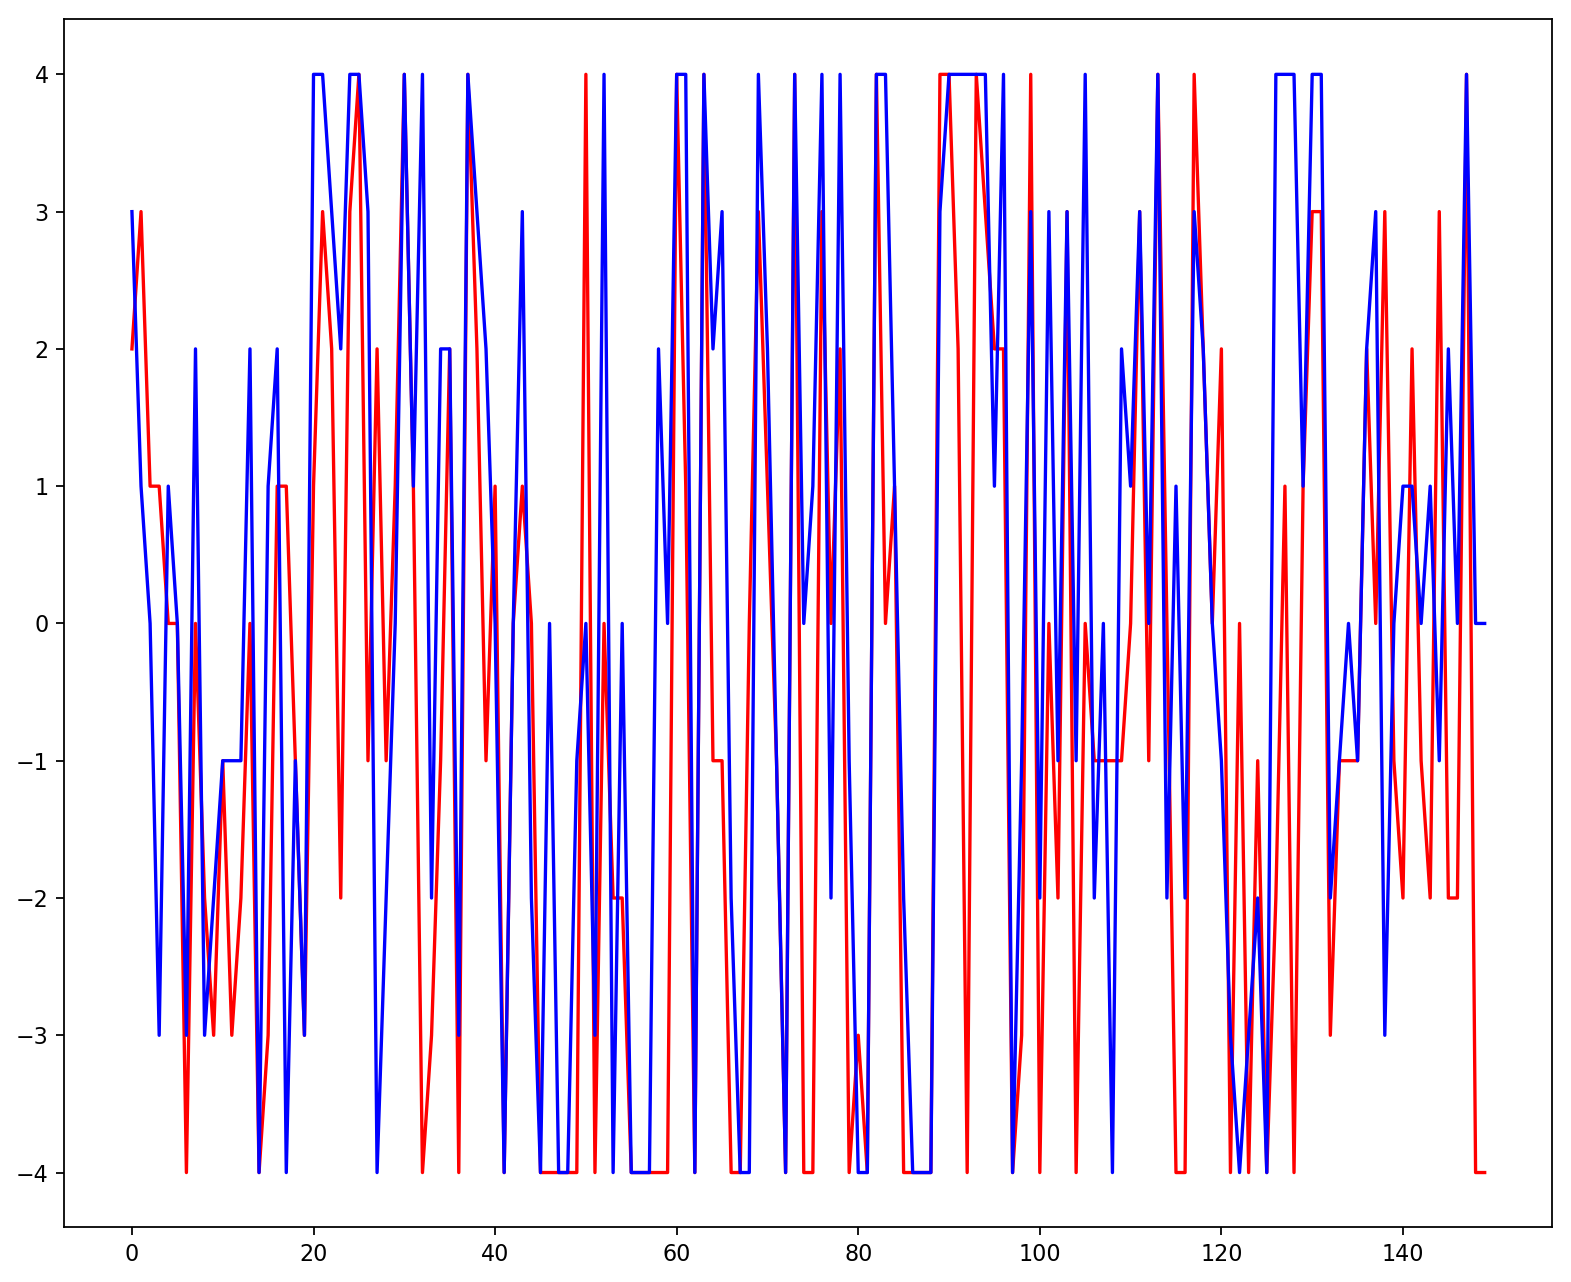

In [14]:
fig=plt.figure(figsize=(12, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(clf.predict(validating_X), 'r-' ,validating_Y, 'b-')

Transform figure to another form. If the stock trend equals to the prediction, it'll output 1 (otherwise -1).

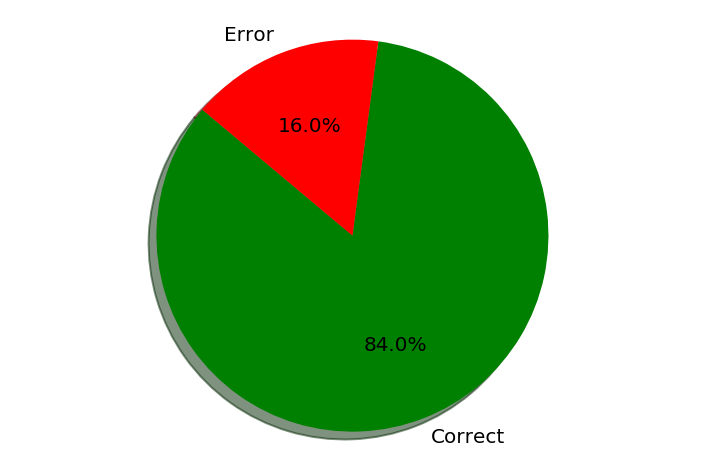

In [15]:
output = []
array1 = clf.predict(validating_X)
array2 = validating_Y

for i in range(0, len(array1)):
    if((array1[i] * array2[i] >= 0)) :
        output.append(1)
    else:
        output.append(-1)
output.count(1)
labels = 'Correct', 'Error'
sizes = [output.count(1), output.count(-1)]
colors = ['green', 'red']
 
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

-----------------

##  Source Code 

In [8]:
if __name__ == '__main__':
    # import from library
    import argparse
    import csv
    
    from sklearn.model_selection import GridSearchCV
    from sklearn.neighbors import KNeighborsClassifier

    class Trader():    
        condition = 0
        predict_result = []
        def checkCondition( self, pre, last):
            ratio = 0.0041
            value = (last - pre) / pre

            if(-0.5 * ratio <= value and value < ratio * 0.5):
                return 0
            elif(0.5 * ratio <= value and value < ratio * 1.5):
                return 1
            elif(1.5 * ratio <= value and value < ratio * 2.5):
                return 2
            elif(2.5 * ratio <= value and value < ratio * 3.5):
                return 3
            elif(3.5 * ratio <= value):
                return 4
            elif(-1.5 * ratio <= value and value < ratio * -0.5):
                return -1
            elif(-2.5 * ratio <= value and value < ratio * -1.5):
                return -2
            elif(-3.5 * ratio <= value and value < ratio * -2.5):
                return -3
            elif(value < ratio * -3.5):
                return -4
        
        def train( self, data ):
            # produce training data
            train_X = []
            train_Y = []
            
            for i in range(1, len(data)):
                train_X.append(data[i-1])
                train_Y.append(self.checkCondition(data[i-1][0], data[i][0]))
            
            split = int(len(data) * 0.1 * -1)
            validating_X = train_X[split:]
            validating_Y = train_Y[split:]
            train_X = train_X[:split]
            train_Y = train_Y[:split]
            
            # cross validation process
            #self.clf = KNeighborsClassifier()
            #parameters = {'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]}
            #self.CV = GridSearchCV(estimator = self.clf, param_grid = parameters, cv=5)
            #self.CV.fit(train_X, train_Y)
            #print (self.CV.best_params_)
            #print (self.CV.best_score_)
            
            self.clf = KNeighborsClassifier(n_neighbors = 3)
            self.clf.fit(train_X, train_Y)
            return
        
        def predict_action( self, data ):
            result = self.clf.predict(data)
            self.predict_result.append(result[0])
            if(result[0] >= 1):
                #rise
                if(self.condition == 1):
                    self.condition = 0
                    return -1
                elif(self.condition == 0):
                    self.condition = -1
                    return -1
                elif(self.condition == -1):
                    return 0
            
            elif(result[0] <= -1):
                #fall
                if(self.condition == 1):
                    return 0
                elif(self.condition == 0):
                    self.condition = 1
                    return 1
                elif(self.condition == -1):
                    self.condition = 0
                    return 1
            
            elif(result[0] == 0):
                #nothing happen
                return  0
    
    def load_data( str ):
        with open(str, 'r') as csvfile:
            data = csv.reader(csvfile, delimiter=',', quoting=csv.QUOTE_NONNUMERIC)
            tmp = []
            for row in data:
                tmp.append(row)
            return tmp

    
    # training_data form: [open, high, low, close]
    # load in training & testing data
    training_data = load_data('training_data.csv')
    testing_data = load_data('testing_data.csv')
    
    trader = Trader()
    trader.train(training_data)
    money = 0
    maximum = 0
    start, end = 0, len(testing_data)
    
    with open('output.csv', 'w') as output_file:
        condition = trader.condition
        for i in range(start , end):
        #for i in range(0, len(testing_data)-1):
            # We will perform your action as the open price in the next day.
            condition = trader.condition
            action = trader.predict_action([testing_data[i]])
            
            if(condition == action and action != 0):
                print(action, trader.condition)
            
            if(action == 1):
                money -= float(testing_data[i+1][0])
            elif(action == -1):
                money += float(testing_data[i+1][0])
            output_file.write(str(action)+'\n')
    
    
    if(trader.condition == 1):
        money += float(testing_data[end-1][3])
    elif(trader.condition == -1):
        money -= float(testing_data[end-1][3])
        
    print("Earn Money:", money)


Earn Money: 176.59628500000002
